# DATA2001 Assignment - Team 3 Report

**Team Members**: Michella Krishna, Yujia Liu, Katherine Kong

**Region Focus**: City and Inner South, North Sydney and Hornsby, Inner West 

## 1. Dataset Description 
Several data sources were used to compute accessibility scores across SA2 regions, each selected for their relevance to local resources.

- **Businesses**  
  Provided by the [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/economy/business-indicators/counts-australian-businesses-including-entries-and-exits/latest-release#data-downloads). This file contains business counts by industry and turnover range for each SA2. The `total_businesses` field was used to calculate business density per 1,000 people in selected sectors.

- **Income**  
  Sourced from the [Canvas](https://canvas.sydney.edu.au/courses/62985/files/40497761?module_item_id=2534409). Includes variables such as `median_income` by SA2. These fields were used to assess the economic situation of each region.

- **Population**  
  Sourced from [Canvas](https://canvas.sydney.edu.au/courses/62985/files/40497767?module_item_id=2534407), reports population counts by age groups. Fields including `total_people` and youth segments (`10_14_people`) were used to support normalization and school-related metrics.

- **Stops**  
  Sourced from [Transport for NSW](https://opendata.transport.nsw.gov.au/dataset/timetables-complete-gtfs). Includes public transport stops with geographic coordinates and SA2 codes. Stop counts were calculated per region.

- **School Catchments**  
  Provided by the [NSW Department of Education](https://data.cese.nsw.gov.au/data/dataset/school-intake-zones-catchment-areas-for-nsw-government-schools). Includes shapefiles for primary, secondary, and future school catchment zones. These spatial layers were used to evaluate school accessibility.

- **POI**  
  Extracted using the [NSW Points of Interest API](https://data.nsw.gov.au/data/dataset/nsw-points-of-interest-poi/resource/f4b643b4-a872-4b63-bbb5-5b768bacbc78). Contains locations of community facilities identified within each SA2 bounding box. Relevant POIs were counted to represent local amenity access.

## 2. Database Description



#### Database Schema
<div style="text-align: center;">
  <img src="Graphs/database_schema.png" alt="Database Schema" style="width:30%;">
</div>

## 3. Result Analysis 

### 3.1 Formula Rationale
To calculate the final score for each SA2 region, four indicators were chosen: **stops**, **schools**, **parks as POI**, and **businesses (retail industry)**. These factors were selected because they reflect important aspects of **local accessibility**, **education**, **community facilities**, and **economic activity**.

Each metric was converted into a **z-score** to standardize their values and allow fair comparison across different scales. The four z-scores were then **added together**, assuming **equal importance** for each component.

Finally, a **sigmoid function** was applied to the total score to scale it between 0 and 1, making the results easier to interpret and compare across regions.

### 3.2 Analysis for Inner West

#### 3.2.1 Component Impact on Final Scores


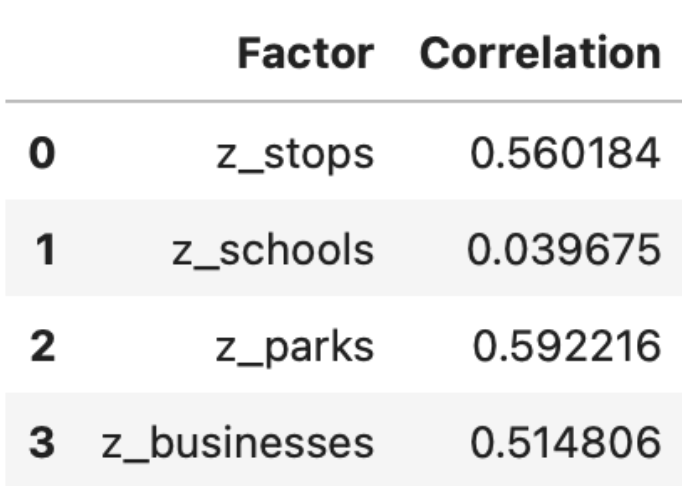

In [73]:
from IPython.display import Image, display
display(Image(filename="Graphs/K_table_1.png", width=300))

The correlation values show how each metric influences the final score. In Inner West, **stops**, **parks**, and **businesses** have the strongest correlations with the final score, meaning they contribute more to score variation. **Schools** has a weak correlation, suggesting school access is more evenly spread across regions.

#### 3.2.2 Distribution of Scores

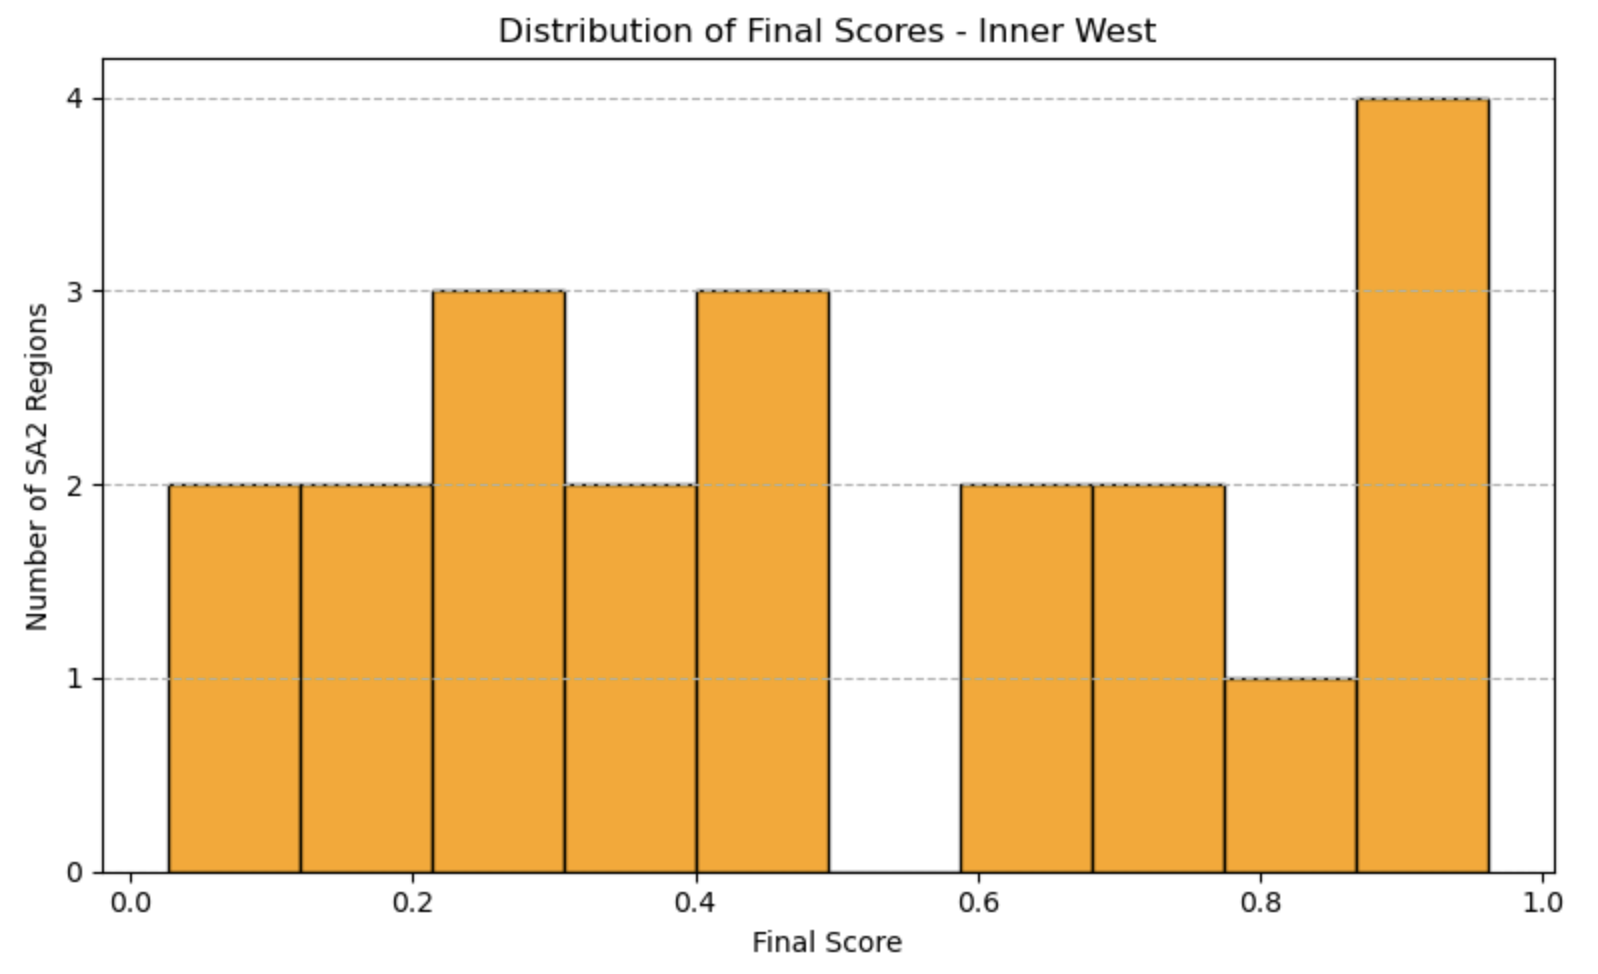

In [94]:
from IPython.display import Image, display
display(Image(filename="Graphs/K_bar.png", width=500))

The distribution of final scores in Inner West appears relatively even, with no extreme clustering. This wide spread indicates that access to key resources in Inner West is **uneven** across different areas.

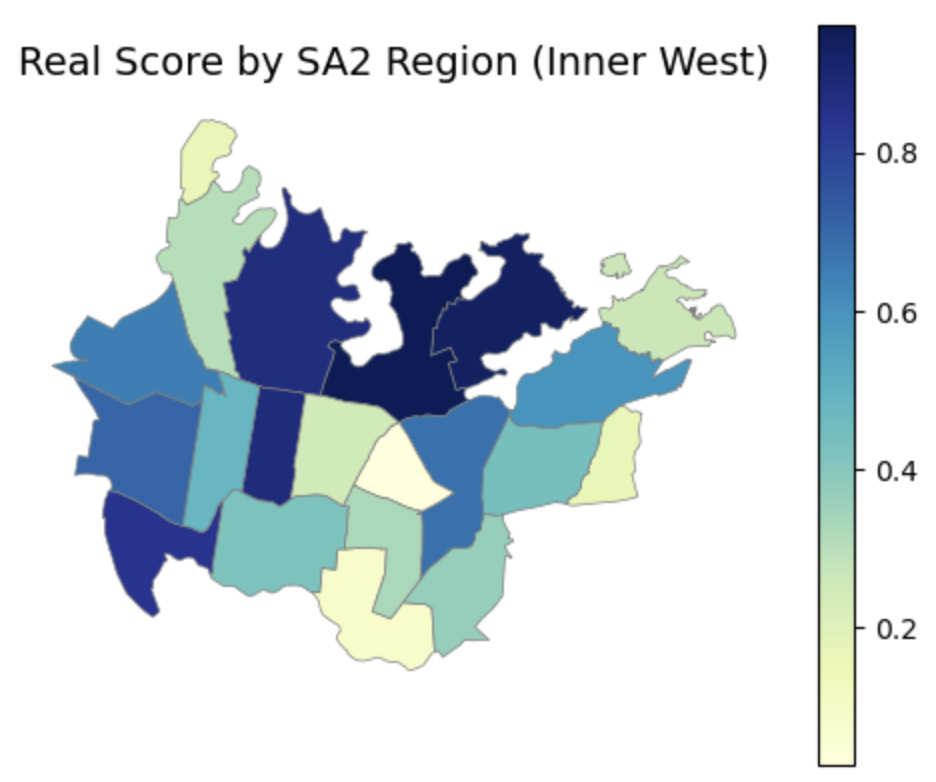

In [99]:
from IPython.display import Image, display
display(Image(filename="Graphs/K_map.png", width=300))

The map visual shows how final resource scores are distributed across SA2 regions in Inner West. Overall, higher scores tend to cluster in the northwestern part of the region (except for a few outliers), suggesting those areas are more well-resourced. In contrast, regions in the southeastern section display lighter shades, indicating relatively lower resource availability. 

#### 3.2.3 Notable Trends or Regions

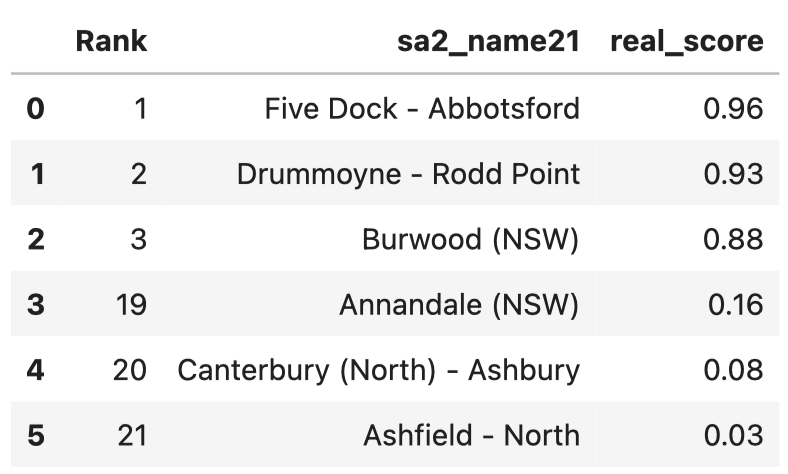

In [87]:
from IPython.display import Image, display
display(Image(filename="Graphs/K_table_2.png", width=350))

The table shows the top three and bottom three SA2 regions by final score. These highlight the range of resource access across Inner West, with noticeable gaps between the highest and lowest scoring areas. 
This reflects particular scores of interest and uneven distribution worth noting in the analysis.

### Analysis for North Sydney and Hornsby 



  <div style="text-align: center;">
    <img src="Graphs/northSydney_histogram.png" alt="Score Distribution Bar Chart" style="height: 280px;"><br>
    <p style="max-width: 300px; margin: 8px auto;">
  </div>

  Turramurra dispays the highest score, closest to 1. Suggesting a high rank (in terms of combined z-scores), likely due to strong availability of stops, schools, businesses and parks. Pymble and St Leonards - Naremburn follow, which concluded an excellent access to these resources. All top 10 aread have a real score > 0.7, which means they are well above average based on the sigmoid transfermation of total z-scores. 

  <div style="text-align: center;">
    <img src="Graphs/northSydney_bottom10.png" alt="Score Distribution Bar Chart" style="height: 280px;"><br>
    <p style="max-width: 300px; margin: 8px auto;">
  </div>

  This is contrasted with the bottom 10 regions of North Sydney and Hornsby, which showcases that Artarmon has the lowest access to these resources. Followed by Wahroonga (west) - Waitara awhich have a real score < 0.10. Well below the average based on the sigmoid transfermation of total z-scores. 

  <div style="text-align: center;">
    <img src="Graphs/northSydney_realscores.png" alt="Score Distribution Bar Chart" style="height: 280px;"><br>
    <p style="max-width: 300px; margin: 8px auto;">
  </div>

The real scores are bounded between 0 and 1 due to the sigmoid transformation, which compresses extreme Z totals. This result in diminishing returns for very high-scoring regions and highlights the accesibility gap between the top and bottom deciles. The data suggests a non-linear but substantial inequality in resource access acrossSA2 regions.

## 4. Correlation Analysis (2 marks)

### 4.1

### 4.2


### 4.3 Inner West

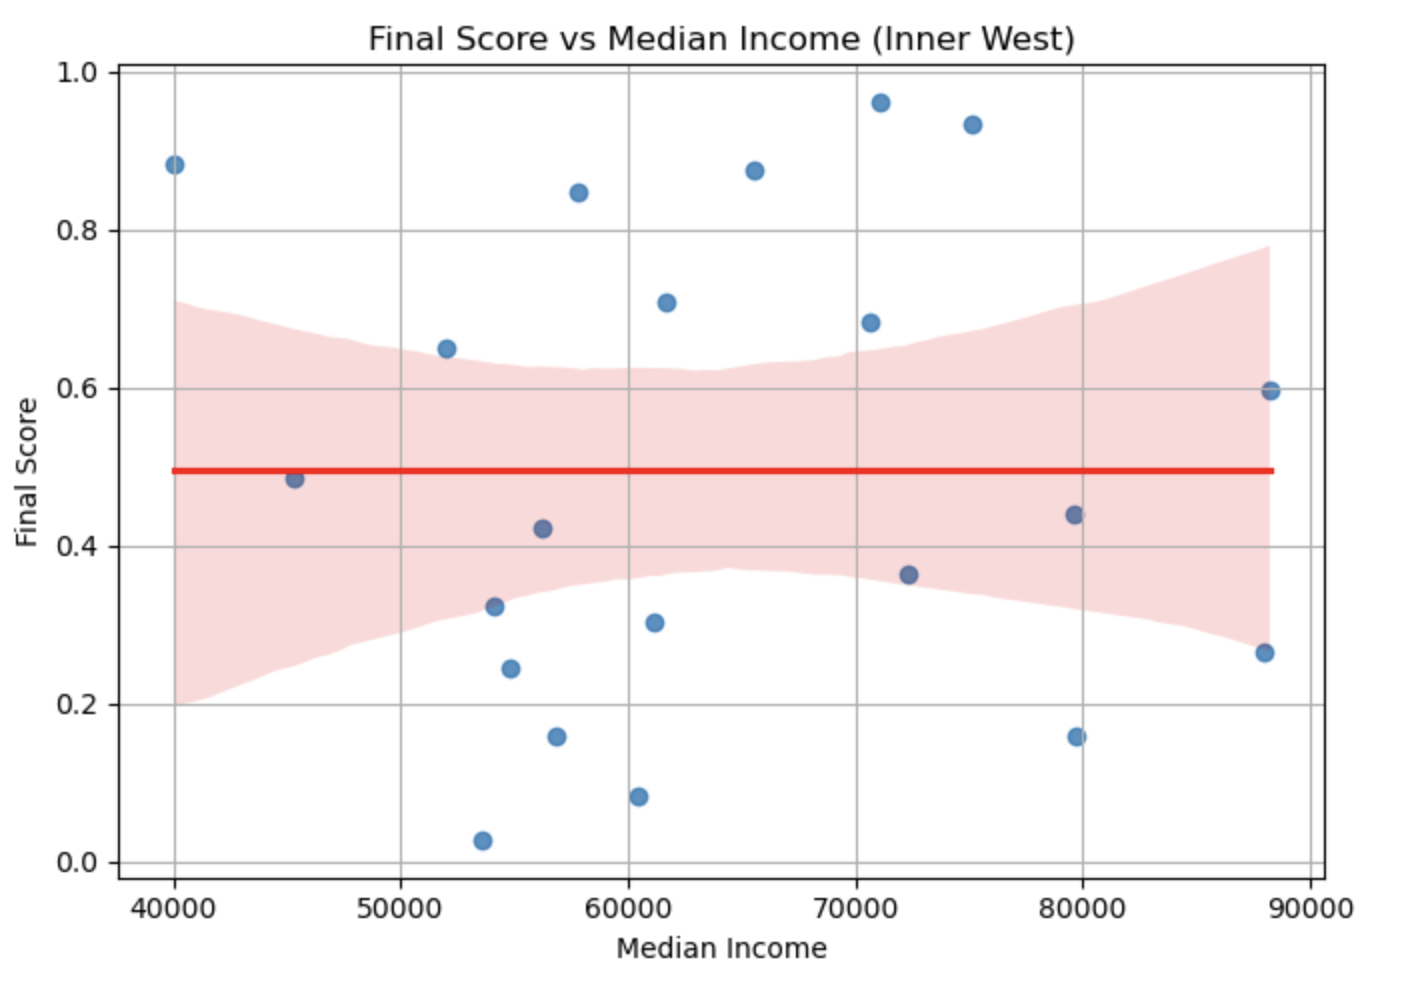

In [81]:
from IPython.display import Image, display
display(Image(filename="Graphs/K_scatter.png", width=500))

To explore the relationship between final scores and income, a basic correlation check was performed between each SA2 region’s median income and its computed score. The result showed no meaningful linear correlation (correlation coefficient ≈ 0), suggesting that the score constructed in this assignment may not reflect the economic situation of Inner West.

### Limitations
The result highlights a key limitation in how the final score was calculated. Although stops, schools, parks, and retail businesses are relevant indicators, they may not fully capture the economic or social dynamics of each SA2 region. Other factors — such as housing affordability, health services, or population density — were not included in the score and may play a significant role in shaping access to resources. 

### North Sydney and Hornsby 
<div style="text-align: center;">
  <img src="Graphs/corr_northsyd.png" alt="Scatter plot" style="width:50%;">
</div>

To explore the relationship between the final scores and income, a correlation analysis was computed. The overall trend displays a regression line slopes downward, indicating a negative correlation. This means that as the median income increases, the real score tends to decrease. The confidence band - the shaded area - is relatively wide, suggesting moderate variability in the relation. 

The data spreads from a rand from just under 0.1 to 1.0. The median income ranges from approximately 53,000 to 85,000. There is a noticable cluster of low-income regions (55k - 65k) that have high real scores. Conversely, many high-income regions (75k - 85k) show low real scores. 

### Reasons for Inverse Correlation 
This is counterintuitive to many expectations - it could be assumed wealthier areas have better access to resources. However, the real scores scptures access to public infrastructure such as stops, parks and businesses - which isn't always concerntrated in high-income areas.

Possible reasons for this inverse correlation could be urban density, where lower-income areas may be more urban, with greater access to public infrastructure, while wealthier areas may be more suburban with less walkability and fewer transit stops. Services like public schools and bus stops might be deliberatly concentrated in more accessible or populous areas, often overlapping with less affluent zones. Wealthier areas may also prioritise residential space over commercial and public amenities, decreasing their real score under the chosen metrics.

## 5. Conclusion
Key findings and what they suggest.



## 6. References

- Australian Bureau of Statistics – Counts of Australian Businesses  
  [https://www.abs.gov.au/statistics/economy/business-indicators/counts-australian-businesses-including-entries-and-exits/latest-release#data-downloads](https://www.abs.gov.au/statistics/economy/business-indicators/counts-australian-businesses-including-entries-and-exits/latest-release#data-downloads)

- NSW Department of Education – School Catchment Areas  
  [https://data.cese.nsw.gov.au/data/dataset/school-intake-zones-catchment-areas-for-nsw-government-schools](https://data.cese.nsw.gov.au/data/dataset/school-intake-zones-catchment-areas-for-nsw-government-schools)

- NSW Points of Interest API  
  [https://data.nsw.gov.au/data/dataset/nsw-points-of-interest-poi/resource/f4b643b4-a872-4b63-bbb5-5b768bacbc78](https://data.nsw.gov.au/data/dataset/nsw-points-of-interest-poi/resource/f4b643b4-a872-4b63-bbb5-5b768bacbc78)

- Transport for NSW – GTFS Timetable Data  
  [https://opendata.transport.nsw.gov.au/dataset/timetables-complete-gtfs](https://opendata.transport.nsw.gov.au/dataset/timetables-complete-gtfs)


## 7. Appendices
- Supplementary tables or extended visuals (if needed).